![image](https://github.com/anamariapego/Data-Science/assets/57241391/24cdaed4-f219-4f8a-8f67-380b6d7b082e)

<h1 style="text-align: center;">Regressão Linear</h1>

O objetivo desse notebook é mostrar um exemplo prático de regressão linear simples e múltipla usando um datatset da plataforma Kaggle

<font size="5"><a id="sumario"><bold>Summary</bold></a></font>
***
>1. [Imports das bibliotecas](#ses1)
>2. [Carregando os dados](#ses2)
>3. [Organização e limpeza dos dados](#ses3)
>4. [Análise exploratória](#ses4)
>5. [Codificação dos dados](#ses5)
>6. [Modelo - Regressão Linear Simples](#ses6)
>7. [Modelo - Regressão Linear Múltipla](#ses7)

<h1 style="text-align:center;" ><a id="ses1">Imports das bibliotecas</a></h1>

[VOLTAR](#sumario)

In [1]:
# Bibliotecas padrão
import warnings
import os

# Carregamento e transformação de dados
import pandas as pd

# Visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

# Encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

# Modelo pré-treinado
import statsmodels.api as sm

In [4]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())
print("")

# Versões de pacotes utilizados 
%reload_ext watermark
%watermark -a "" --iversions

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.10.10

matplotlib : 3.8.3
statsmodels: 0.14.0
pandas     : 1.5.3
seaborn    : 0.13.0



In [5]:
# Para ignorar mensagens de alertas 
warnings.filterwarnings('ignore')

%config Completer.use_jedi = False

# Visualizar todas as colunas do dataset
pd.set_option('display.max_columns', None)

In [4]:
# Defina uma função para destacar uma linha específica
def specific_row(s, indices):
    if s.name in indices:
        return ['background-color: #c0c0c0'] * len(s)
    else:
        return [''] * len(s)

<h1 style="text-align:center;" ><a id="ses2">Carregando os dados</a></h1>

[VOLTAR](#sumario)

O conjunto de dados foram extraídos do [Kaggle](https://www.kaggle.com/datasets/rkiattisak/salaly-prediction-for-beginer), esse conjunto contém informações sobre os salários dos funcionários de uma empresa. Cada linha representa um funcionário diferente e as colunas incluem informações como idade, sexo, nível educacional, cargo, anos de experiência e salário.

In [40]:
os.chdir('C:/Projetos/Data_Science/Dados/')

salary = pd.read_csv('SalaryData.csv')

In [41]:
# Visualizando as primeiras linhas 
salary.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


<h1 style="text-align:center;" ><a id="ses3">Organização e Limpeza dos Dados</a></h1>

[VOLTAR](#sumario)


O objetivo dessa etapa não é fazer grandes transformações porque não é o foco aqui, será feito algumas mofificação apenas para que seja viável continuar a análise.

In [43]:
# Dimensão dos dados
print(f'''
Conjunto de dados: {salary.shape[0]} linhas e {salary.shape[1]} colunas.''')


Conjunto de dados: 375 linhas e 6 colunas.


In [44]:
# Tipos dos dados
salary.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

In [45]:
# Verificando os valores missing
salary[salary.isnull().any(axis=1)]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# Removendo as linhas nulas
salary = salary.dropna()

In [47]:
# Limpando os nomes das colunas
salary.columns = [col.lower().replace(' ', '_').strip() for col in salary.columns]

<h1 style="text-align:center;" ><a id="ses4">Análise Exploratória dos Dados</a></h1>

[VOLTAR](#sumario)

In [48]:
# Estatística básica das variáveis numéricas
salary.describe().T

,count,mean,std,min,25%,50%,75%,max
age,373.0,37.431635,7.069073,23.0,31.0,36.0,44.0,53.0
years_of_experience,373.0,10.030831,6.557007,0.0,4.0,9.0,15.0,25.0
salary,373.0,100577.345845,48240.013482,350.0,55000.0,95000.0,140000.0,250000.0


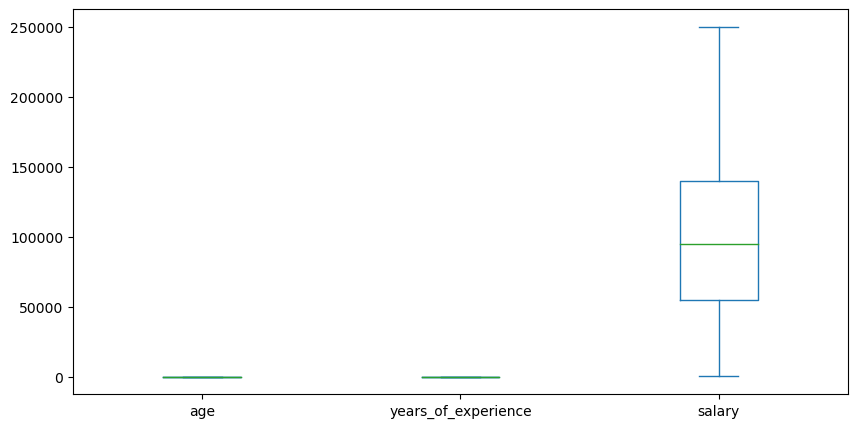

In [49]:
# Verificando se há presença de outliers
salary[['age', 'years_of_experience','salary']].plot.box(figsize=(10,5))
plt.show()

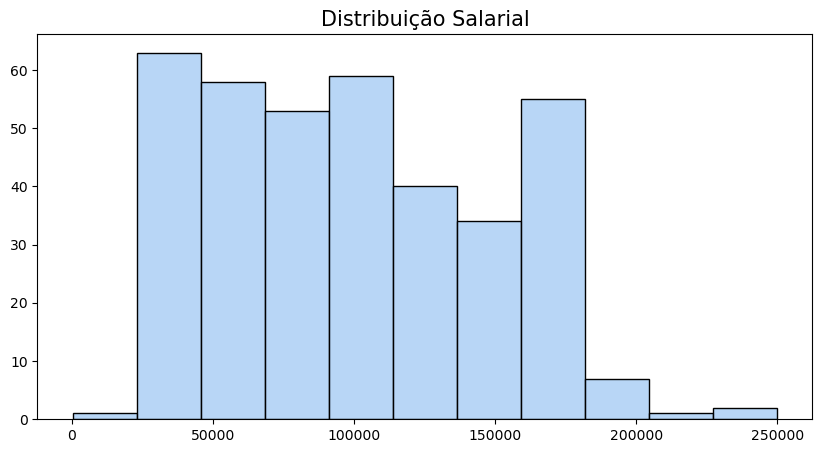

In [57]:
# Histograma de salário
plt.figure(figsize=(10, 5))

sns.histplot(salary['salary'], color = '#a1c9f4')
plt.title('Distribuição Salarial', size=15)
plt.xlabel("")  
plt.ylabel("")
plt.show()

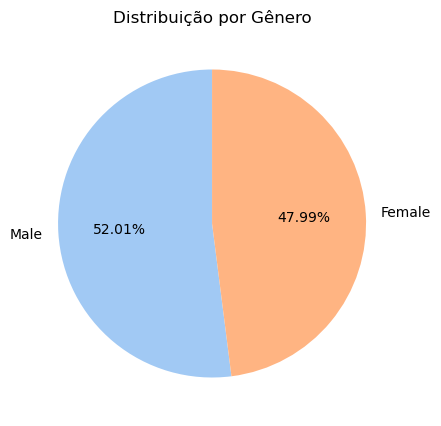

In [51]:
# Porcentagens de mulheres e homens
labels = salary['gender'].value_counts().index
values = salary['gender'].value_counts().values

colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(10, 5))
plt.pie(values, labels=labels, autopct='%1.2f%%', colors = colors, startangle=90)

plt.title('Distribuição por Gênero')
plt.show()

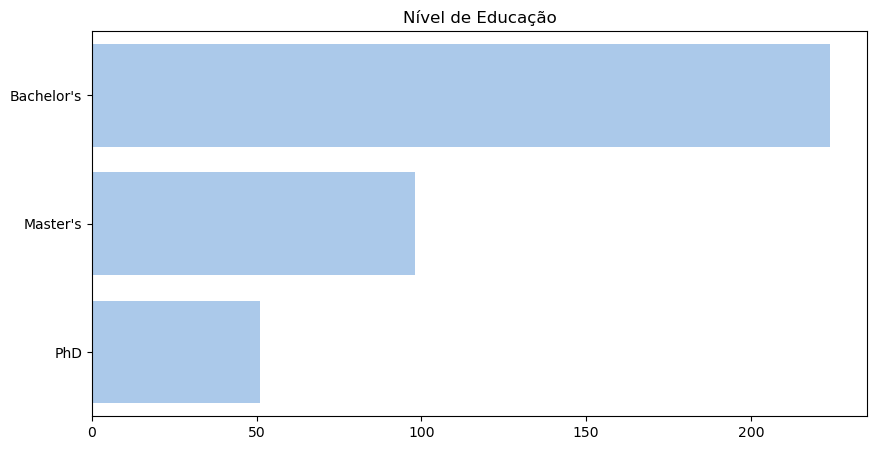

In [56]:
# Nível de educação
plt.figure(figsize=(10, 5))
sns.countplot(salary.education_level, color = '#a1c9f4')

plt.title('Nível de Educação')
plt.xlabel("")  
plt.ylabel("")
plt.show()

In [58]:
print(f"Quantidade de cargos distintos: {salary.job_title.nunique()}")

Quantidade de cargos distintos: 174


In [59]:
# Cargos com maiores salários
salary.nlargest(10, 'salary', keep='all').style.apply(specific_row, indices=[229, 158], axis=1)

,age,gender,education_level,job_title,years_of_experience,salary
30,50.000000,Male,Bachelor's,CEO,25.000000,250000.000000
83,52.000000,Male,PhD,Chief Technology Officer,24.000000,250000.000000
105,44.000000,Male,PhD,Chief Data Officer,16.000000,220000.000000
4,52.000000,Male,Master's,Director,20.000000,200000.000000
53,47.000000,Male,Master's,VP of Finance,19.000000,200000.000000
21,47.000000,Male,Master's,VP of Operations,19.000000,190000.000000
41,48.000000,Male,Master's,Operations Director,18.000000,190000.000000
72,45.000000,Male,PhD,Research Director,16.000000,190000.000000
229,51.000000,Female,Master's,Director of Human Resources,21.000000,190000.000000
158,51.000000,Female,PhD,Director of Human Resources,23.000000,185000.000000


In [60]:
# Salários com tempo de experiência
salary.nlargest(10, ['salary', 'years_of_experience'], keep='all').style.apply(specific_row, indices=[229, 158], axis=1)

,age,gender,education_level,job_title,years_of_experience,salary
30,50.000000,Male,Bachelor's,CEO,25.000000,250000.000000
83,52.000000,Male,PhD,Chief Technology Officer,24.000000,250000.000000
105,44.000000,Male,PhD,Chief Data Officer,16.000000,220000.000000
4,52.000000,Male,Master's,Director,20.000000,200000.000000
53,47.000000,Male,Master's,VP of Finance,19.000000,200000.000000
229,51.000000,Female,Master's,Director of Human Resources,21.000000,190000.000000
21,47.000000,Male,Master's,VP of Operations,19.000000,190000.000000
41,48.000000,Male,Master's,Operations Director,18.000000,190000.000000
72,45.000000,Male,PhD,Research Director,16.000000,190000.000000
158,51.000000,Female,PhD,Director of Human Resources,23.000000,185000.000000


<h3 style='color : #cca002'> Observações: </h3>

Na primeira tabela, são listados os 10 maiores salários, e ao observar os resultados, nota-se que em nono e décimo lugar, o mesmo cargo é ocupado por duas mulheres. Na segunda tabela, são listados os 10 maiores salários e o tempo de experiência. Nota-se uma reorganização na ordenação em comparação com a primeira tabela; os cargos e salários permaneceram os mesmos. Um dos cargos que era ocupado por uma mulher foi reordenado do nono lugar para o sexto lugar. Outro ponto que também chamou a atenção foi que as duas mulheres têm o mesmo cargo, mas a que possui menos tempo de experiência e formação em mestrado tem um salário maior em relação à outra. 

Quão correlacionadas essas informações estão com o salário?

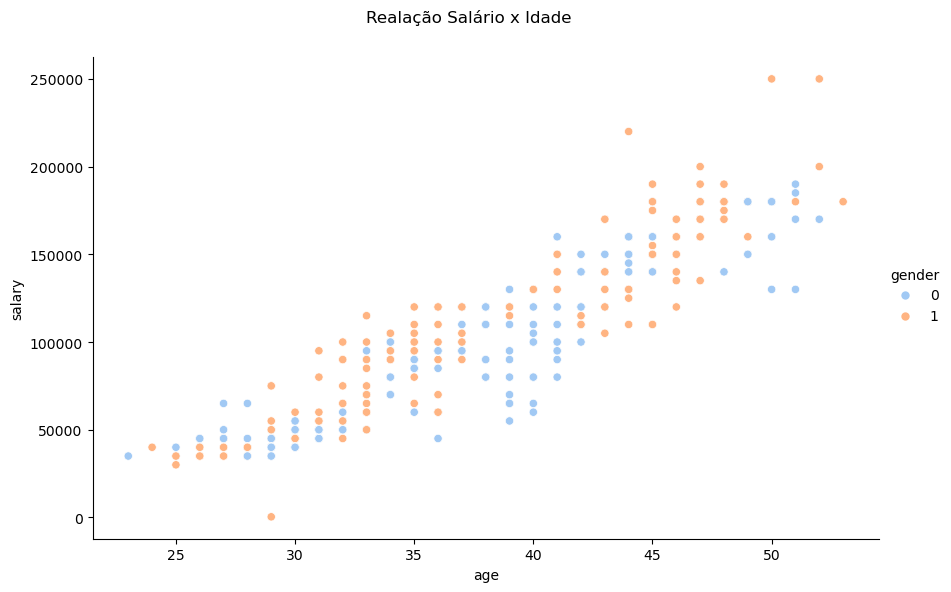

In [82]:
ax = sns.relplot(
    data=salary,    
    x="age",     
    y="salary",       
    hue="gender", 
    palette='pastel',
    height=6,      
    aspect=1.5    
)

# Exibir o gráfico
ax.fig.suptitle('Realação Salário x Idade')
plt.xlabel("age")  
plt.ylabel("salary")
ax.fig.subplots_adjust(top=.9)

plt.show()

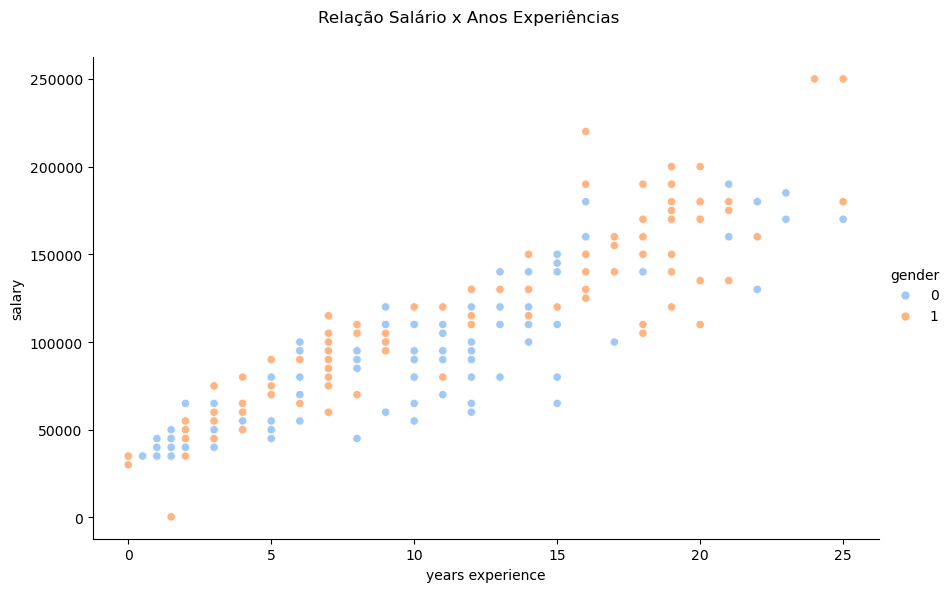

In [81]:
ax = sns.relplot(
    data=salary,    
    x="years_of_experience",     
    y="salary",       
    hue="gender", 
    palette='pastel',
    height=6,      
    aspect=1.5    
)

# Exibir o gráfico
ax.fig.suptitle('Relação Salário x Anos Experiências')
plt.ylabel("salary")  
plt.xlabel("years experience")
ax.fig.subplots_adjust(top=.9)

plt.show()

In [23]:
# Correlação das variáveis numéricas
salary.select_dtypes(exclude='object').corr().style.background_gradient(cmap='YlGnBu').format(precision=2)

,age,years_of_experience,salary
age,1.00,0.98,0.92
years_of_experience,0.98,1.00,0.93
salary,0.92,0.93,1.00


<h3 style='color : #cca002'> Observações: </h3>

Observando os gráficos de dispersão e a tabela de correlação, podemos notar que a idade e os anos de experiência estão positivamente correlacionados com o salário. Isso significa que o aumento da idade e o aumento dos anos de experiência também aumentam o valor do salário.

<h1 style="text-align:center;" ><a id="ses5">Codificação dos Dados</a></h1>

[VOLTAR](#sumario)

No dataset, temos três colunas que são do tipo categóricas, mas não podem ser processadas diretamente por modelos de aprendizado de máquina. Para resolver isso, vamos utilizar técnicas de codificação para converter os dados categóricos em formato numérico.

As colunas **gender** e **job_title** são do tipo categóricas nominais, onde a ordem ou classificação não são importantes. Por outro lado, a coluna **education_level** é do tipo categórica ordinal, onde a ordem ou classificação são relevantes.



In [66]:
# Codificação das nominais
encoder = LabelEncoder()

salary['gender'] = encoder.fit_transform(salary['gender'])
salary['job_title'] = encoder.fit_transform(salary['job_title'])

In [67]:
# Codificação da ordinal
ordinal = OrdinalEncoder(categories=[["Bachelor's", "Master's", "PhD"]])

salary['education_level'] = ordinal.fit_transform(salary[['education_level']])

In [68]:
salary.select_dtypes(exclude='object').corr().style.background_gradient(cmap='YlGnBu').format(precision=2)

,age,gender,education_level,job_title,years_of_experience,salary
age,1.00,-0.02,0.56,0.12,0.98,0.92
gender,-0.02,1.00,-0.04,0.01,0.00,0.07
education_level,0.56,-0.04,1.00,0.10,0.59,0.67
job_title,0.12,0.01,0.10,1.00,0.10,0.14
years_of_experience,0.98,0.00,0.59,0.10,1.00,0.93
salary,0.92,0.07,0.67,0.14,0.93,1.00


<h3 style='color : #cca002'> Observações: </h3>

Após a conversão das variáveis que eram categóricas em numéricas, a tabela de correlação foi refeita para analisar se essas variáveis apresentavam alguma correlação com o salário. Nota-se que o nível de educação apresenta uma correlação positiva com o salário, já o gênero e o cargo não apresentam tanto impacto no salário.

<h1 style="text-align:center;" ><a id="ses6">Regressão Linear Simples</a></h1>

[VOLTAR](#sumario)

**Y = a + bX + ε**

Onde Y é a variável dependente, X é a variável independente, a é o coeficiente linear (intercepto), b é o coeficiente angular (inclinação) e ε é o erro aleatório.

**Y** -> *salary*

**X** -> *years_of_experience*

In [69]:
# Definindo a váriável dependente
y = salary['salary']

In [70]:
# Definindo a váriável independente
X = salary['years_of_experience']

In [71]:
# O Statsmodels requer a adição de uma constante à variável independente
X = sm.add_constant(X)

In [72]:
# Criando o modelo
model_simples = sm.OLS(y, X)

In [73]:
# Treinando o modelo
results = model_simples.fit()

In [74]:
# Resumo estatístico do modelo
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     2388.
Date:                Thu, 02 Nov 2023   Prob (F-statistic):          1.02e-163
Time:                        14:10:03   Log-Likelihood:                -4177.0
No. Observations:                 373   AIC:                             8358.
Df Residuals:                     371   BIC:                             8366.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.192e+04   1677.842     19.025      0.000    2.86e+04    3.52e+04
years_of_experience  6844.5105    140.065     48.867      0.000    6569.089    7119.932
==============================================================================
Omnibus:                       42.211   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.478
Skew:                          -0.511   Prob(JB):                     1.14e-26
Kurtosis:                       5.577   Cond. No.                         22.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

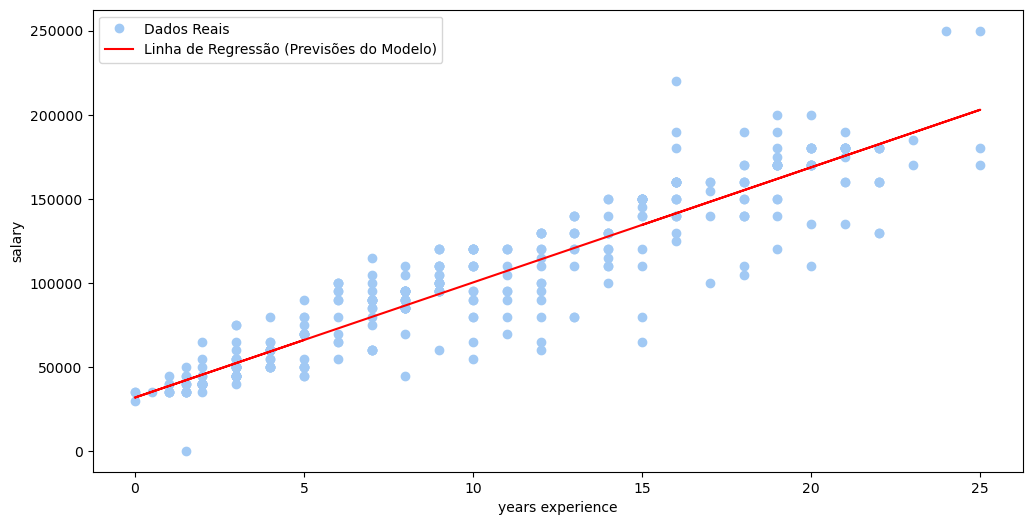

In [84]:
# Visualização das predições
plt.figure(figsize = (12, 6))

plt.xlabel("years experience")
plt.ylabel("salary")
plt.plot(X["years_of_experience"], y, "o", label = "Dados Reais", color = '#a1c9f4')
plt.plot(X["years_of_experience"], results.fittedvalues, "r-", label = "Linha de Regressão (Previsões do Modelo)")
plt.legend(loc = "best")
plt.show()

<h3 style='color : #cca002'> Entendendo os resultados: </h3>

Claramente existe uma relação forte entre os anos de experiência e o valor do salário. O valor de R² é 86%, o que é considerado bom. Isso indica que a variável ano de experiência(years_of_experience) é bastante eficaz na explicação da variação no valor do salário.

O coeficiente de *6844.5105* para a variável ano de experiência significa que, em média, o salário tende a aumentar em *6844.5105* dólares para cada ano adicional de experiência. 

Vamos adicionar mais variáveis de entrada ao modelo, a fim de investigar se outros fatores influenciam o valor do salário. Dessa forma, o modelo de regressão linear simples se tornará um modelo de regressão múltipla.

<h1 style="text-align:center;" ><a id="ses7">Regressão Linear Múltipla</a></h1>

[VOLTAR](#sumario)

**Y = a + b1X1 + b2X2 + ... + bnXn + ε**

Onde Y é a variável dependente, X1, X2, ..., Xn são as variáveis independentes, a é o coeficiente linear (intercepto), b1, b2, ..., bn são os coeficientes angulares (inclinações) e ε é o erro aleatório.

**Y** -> *salary*

**X** -> *age, gender, education_level, job_title, years_of_experience,salary*

In [34]:
# Definindo as váriáveis independentes
X_train = salary[['age', 'gender', 'education_level', 'job_title', 'years_of_experience']]

In [35]:
# Adição de uma constante às variáveis independentes
X_train = sm.add_constant(X_train)

In [36]:
# Criando o modelo
model_multiple = sm.OLS(y, X_train)

In [37]:
# Treinando o modelo
results_multiple = sm.OLS(y, X_train).fit()

In [85]:
# Resumo estatístico do modelo
results_multiple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     668.5
Date:                Thu, 02 Nov 2023   Prob (F-statistic):          7.24e-182
Time:                        14:15:00   Log-Likelihood:                -4119.8
No. Observations:                 373   AIC:                             8252.
Df Residuals:                     367   BIC:                             8275.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -4.428e+04   1.52e+04     -2.923      0.004   -7.41e+04   -1.45e+04
age                  2652.2950    561.029      4.728      0.000    1549.061    3755.529
gender               8322.2817   1598.208      5.207      0.000    5179.487    1.15e+04
education_level      1.329e+04   1369.188      9.707      0.000    1.06e+04     1.6e+04
job_title              27.3299     17.235      1.586      0.114      -6.563      61.223
years_of_experience  3156.9228    619.223      5.098      0.000    1939.253    4374.593
==============================================================================
Omnibus:                       27.076   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.191
Skew:                           0.188   Prob(JB):                     4.29e-20
Kurtosis:                       5.366   Cond. No.                     2.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h3 style='color : #cca002'> Entendendo os resultados: </h3>

O valor de R² é 90%, o que é considerado bom. Isso significa que o grau de variância na variável Y é explicado pelas variáveis X, ou seja, indica que as variáveis de entradas são eficaz na explicação da variação no valor do salário.  

Observando os valores de p, podemos observar que cargo(job_title) não é uma variável X significativa, uma vez que o valor de p é maior que 0,05
 

Assim, fica claro que, utilizando as 4 variáveis independentes, nosso modelo pode prever com precisão as salários. No entanto, nosso modelo tem apenas um valor de R² de 90%, o que implica que há aproximadamente 10% de fatores desconhecidos influenciando nos valores dos salários. 

É sempre importante deixar claro que correlação não implica causalidade e que não podemos afirmar que o valor do aluguel muda apenas devido à área dos imóveis. Para estudar causalidade devemos aplicar *Análise Causal* o que não é o foco nosso estudo.

<h2 style="color: #1f9d76">FIM</h2>